In [ ]:
import tweepy
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score
from yellowbrick.text import TSNEVisualizer
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv('datacovid19.csv',encoding='utf-8',error_bad_lines=False)

In [ ]:
data.klasifikasi.replace(['negative','positive'],[0,1],inplace=True)
data.head()

,Unnamed: 0,tweet,klasifikasi,remove_punctuation,remove_stopwords,Text_bersih
0,0,"Waspada COVID-19 Melandai,\nWaspada Tukang Jua...",0,waspada covid melandai waspada tukang juala...,waspada covid melandai waspada tukang jualan v...,waspada covid landai waspada tukang jual vaksi...
1,1,"Sudah vaksin dosis 2, kenapa harus rest pcr un...",0,sudah vaksin dosis kenapa harus rest pcr un...,vaksin dosis rest pcr syarat penerbangan tolak...,vaksin dosis rest pcr syarat terbang tolaktest...
2,2,Yang tidak percaya covid tpi tetap ngikutin pr...,0,yang tidak percaya covid tpi tetap ngikutin pr...,percaya covid tpi ngikutin protokol kesehatan ...,percaya covid tpi ngikutin protokol sehat serv...
3,3,Berita \ntahun 2020: penuh dengan terpapar pen...,1,berita tahun penuh dengan terpapar penyakit...,berita penuh terpapar penyakit kenaikan terpap...,berita penuh papar sakit naik papar virus lonj...
4,4,"Yg satu pengen nguasai mars, yg satu lg pengen...",1,yg satu pengen nguasai mars yg satu lg pengen...,yg pengen nguasai mars yg lg pengen bikin tour...,yg ken nguasai mars yg lg ken bikin tour angka...


In [ ]:
# Bagi  data menjadi seimbang
# optional
# For limit data sampel SKENARIO 1
s_1 = data[data['klasifikasi']==1].sample(3000,replace=True)
s_2 = data[data['klasifikasi']==0].sample(3000,replace=True)
data = pd.concat([s_1, s_2])
#Check value counts of Labels
data['klasifikasi'].value_counts()

1    3000
0    3000
Name: klasifikasi, dtype: int64

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(data['Text_bersih'], data['klasifikasi'], test_size = 0.3, random_state=0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

In [ ]:
data_train = pd.DataFrame()
data_train['Text_bersih'] = X_train
data_train['klasifikasi'] = y_train

data_test = pd.DataFrame()
data_test['Text_bersih'] = X_test
data_test['klasifikasi'] = y_test

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(data['Text_bersih'])
data_train_x = tfidf.transform(data_train['Text_bersih'])
data_test_x = tfidf.transform(data_test['Text_bersih'])

In [ ]:
#coding svm linear
linear = SVC(kernel='linear',probability=True)
linear.fit(data_train_x,y_train)
linear1=linear.predict(data_test_x)
#buat history time 
classifier_linear = SVC(verbose=1)
time_0 = time.time()
history = linear.fit(data_train_x, y_train)
time_1 = time.time()
prediction_linear = linear.predict(data_train_x)
time_2 = time.time()
time_linear_train = time_1-time_0
time_linear_predict = time_2-time_1
y_train_hat_linear=linear.predict(data_train_x)
y_test_hat_linear=linear.predict(data_test_x)
#tampilkan hasil test dan training score
y_train_hat_linear=linear.predict(data_train_x)
y_test_hat_linear=linear.predict(data_test_x)
print ( "train accuracy= "  ,np.mean(y_train_hat_linear == y_train)*100)
print ("test accuracy= "  ,np.mean(y_test_hat_linear == y_test)*100)
#tampilkan hasil dari metode svm kernel linear
linear.score(data_test_x, y_test)

train accuracy=  97.47619047619047
test accuracy=  88.61111111111111


0.8861111111111111

Accuracy score is 89%.

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       924
           1       0.87      0.89      0.88       876

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800


Confusion Matrix:


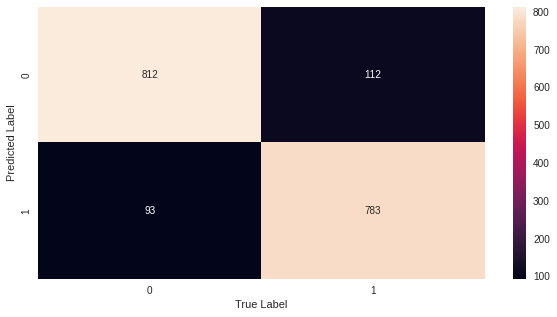



True Positive :  783
True Negative :  812
False Positive :  93
False Negative  :  112




In [ ]:
predictions_linear = linear.predict(data_test_x)
test_prediction = pd.DataFrame()
test_prediction['Text_bersih'] = X_test
test_prediction['klasifikasi'] = predictions_linear
linear_accuracy= accuracy_score(predictions_linear, y_test)*100
linear_accuracy= round(linear_accuracy,1)
linear_accuracy = accuracy_score(predictions_linear,y_test) * 100
print("Accuracy score is {}%.".format (round(linear_accuracy),1))
print()
print("Classification Report:")
print(classification_report(predictions_linear, y_test))
print()

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(predictions_linear,y_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()
# Confusion matrixSVMLinear
tn, fp, fn, tp = confusion_matrix(y_test, linear1).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)
print('\n')

In [ ]:
# Funtion to Implement SVM Classification
def SVM_Classification(kernel="rbf",probability=False):
    
    start_time = time.time()
    
    from sklearn.svm import SVC
    classifier = SVC(kernel=kernel,random_state=0,probability=probability)
    classifier.fit(data_train_x,y_train)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    #Predicting for test data
    predict_classifier = classifier.predict(data_test_x)
    
    
    #Confusion Matrix
    cm=np.array(confusion_matrix(y_test,predict_classifier,labels=[0,1]))
    confusion = pd.DataFrame(cm, index=['Actual 0','Actual 1'],columns=['predicted as 0','predicted as 1'])
    #sns.heatmap(confusion, annot=True,fmt="d",cmap="YlGnBu")
    #plt.title("Confusion Matrix", fontsize = 20)
    acc=accuracy_score(y_test,predict_classifier)
    print("Accuracy of SVM Classification with ",kernel," kernel : ",acc)
    print("Error rate of SVM Classification with ",kernel," kernel : ",1-acc)
    

In [ ]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernel_list:
    SVM_Classification(kernel)

--- 1.7218084335327148 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8861111111111111
Error rate of SVM Classification with  linear  kernel :  0.11388888888888893
--- 1.623006820678711 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.885
Error rate of SVM Classification with  poly  kernel :  0.11499999999999999
--- 1.938302755355835 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8966666666666666
Error rate of SVM Classification with  rbf  kernel :  0.10333333333333339
--- 1.8925905227661133 seconds ---
Accuracy of SVM Classification with  sigmoid  kernel :  0.8566666666666667
Error rate of SVM Classification with  sigmoid  kernel :  0.1433333333333333


HITUNG SVM MENGGUNAKAN DEGREE 3 DAN C1 UNTUK RBF DAN POLY ⛳

In [ ]:
# Funtion to Implement SVM Classification
def SVM_Classification2(kernel="linear",probability=True,degree=0,C=1):
    
    start_time = time.time()
    
    from sklearn.svm import SVC
    classifier = SVC(kernel=kernel,random_state=0,probability=probability,degree=degree,C=C)
    classifier.fit(data_train_x,y_train)

    #Predicting for test data
    predict_classifier = classifier.predict(data_test_x)
    
    t = (time.time() - start_time)
    
    #Confusion Matrix
    cm=np.array(confusion_matrix(y_test,predict_classifier,labels=[0,1]))
    confusion = pd.DataFrame(cm, index=['Actual 0','Actual 1'],columns=['predicted as 0','predicted as 1'])
    #sns.heatmap(confusion, annot=True,fmt="d",cmap="YlGnBu")
    #plt.title("Confusion Matrix", fontsize = 20)
    
    acc=accuracy_score(y_test,predict_classifier)
    print("Accuracy of SVM Classification with ",kernel," kernel : ",acc)
    
    print("--- %s seconds ---" % (time.time() - start_time))
    
    probs = classifier.predict_proba(data_test_x)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)


    return probs, preds, fpr, tpr, roc_auc, acc, t

Accuracy of SVM Classification with  linear  kernel :  0.8861111111111111
--- 9.679368495941162 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.49722222222222223
--- 15.194793224334717 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8966666666666666
--- 10.836201667785645 seconds ---
Accuracy of SVM Classification with  sigmoid  kernel :  0.8566666666666667
--- 10.67746090888977 seconds ---


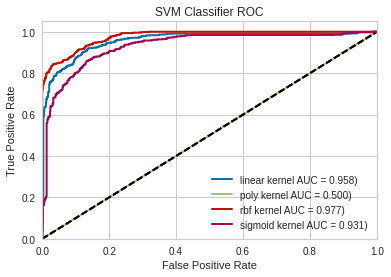

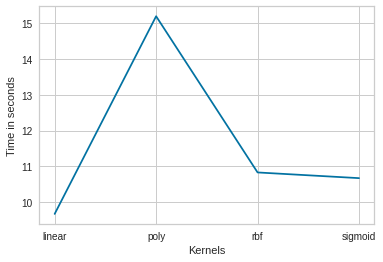

In [ ]:
from sklearn.metrics import roc_curve, auc
kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
time_list=[]
for kernel in kernel_list:
    probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel)
    time_list.append(t)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC')
    plt.plot(fpr, tpr, lw=2, label=kernel+' kernel AUC = %0.3f)'%roc_auc)
    plt.legend()

plt.show()

plt.plot(kernel_list,time_list)
plt.xlabel("Kernels")
plt.ylabel("Time in seconds")
plt.show()

Accuracy of SVM Classification with  linear  kernel :  0.49722222222222223
--- 15.623825788497925 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.6255555555555555
--- 15.471390962600708 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.7977777777777778
--- 12.498692989349365 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8638888888888889
--- 10.491499662399292 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8861111111111111
--- 9.621421575546265 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.9055555555555556
--- 9.943357706069946 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.9061111111111111
--- 9.793136835098267 seconds ---


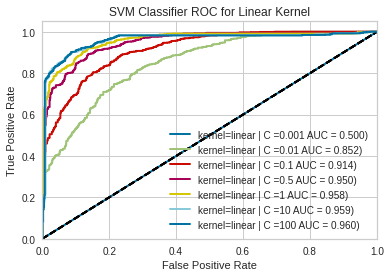

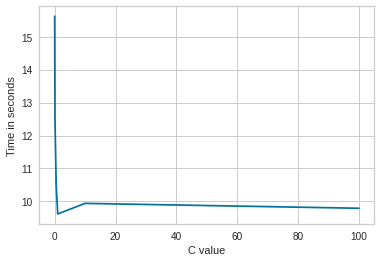

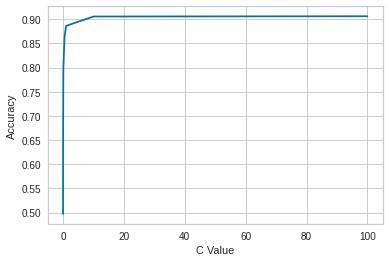

In [ ]:
C = [0.001,0.01,0.1,0.5,1,10,100]
time_list=[]
accuracy=[]
for c in C:
    probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel='linear',C=c)
    time_list.append(t)
    accuracy.append(acc)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC for Linear Kernel')
    plt.plot(fpr, tpr, lw=2, label='kernel=linear | C ='+str(c)+' AUC = %0.3f)'%roc_auc)
    plt.legend(loc="lower right")

plt.show()

plt.plot(C,time_list)
plt.xlabel("C value")
plt.ylabel("Time in seconds")
plt.show()

plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.plot(C,accuracy)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
linear_cv = SVC(kernel='linear',random_state=0)
scores = cross_val_score(linear_cv,data_train_x,y_train,cv=10,scoring="accuracy")
scores.mean()

0.8716666666666667

Mean Accuracy for C-Value 0.001 :  0.5011904761904762
Mean Accuracy for C-Value 0.01 :  0.6164285714285714
Mean Accuracy for C-Value 0.1 :  0.7938095238095239
Mean Accuracy for C-Value 0.5 :  0.8564285714285715
Mean Accuracy for C-Value 1 :  0.8716666666666667
Mean Accuracy for C-Value 10 :  0.8842857142857141
Mean Accuracy for C-Value 100 :  0.8859523809523809


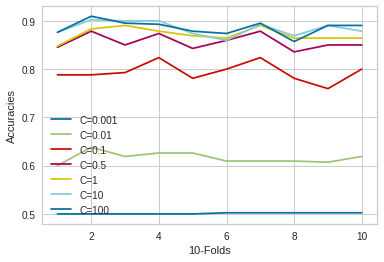

In [ ]:
c_value=[0.001,0.01,0.1,0.5,1,10,100]
cv=list(range(1,11))
i=0
mscores = []
for c in c_value:
    linear_cv = SVC(kernel='linear',random_state=0,C=c)
    scores = cross_val_score(linear_cv,data_train_x,y_train,cv=10,scoring="accuracy")
    
    plt.plot(cv,scores,label="C="+str(c))
    plt.xlabel("10-Folds")
    plt.ylabel("Accuracies")
    plt.legend()
    i+=1
    print("Mean Accuracy for C-Value "+str(c)+" : ",scores.mean())
    mscores.append(scores.mean())
#plt.plot(cv, mscores, label="Mean Accuracy")
plt.show()

In [ ]:
scores.mean()

0.8859523809523809

In [ ]:
from sklearn.model_selection import GridSearchCV

param_list = { 'C' : [0.001,0.01,0.1,0.5,1,10,100] }

classlinear = SVC(kernel = 'linear', random_state = 0)

score = ['accuracy']

classlinear_model = GridSearchCV(estimator = classlinear,
                           param_grid = param_list,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
classlinear_model.fit(data_train_x, np.ravel(y_train))
best_accuracy = classlinear_model.best_score_
best_parameters = classlinear_model.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 88.60 %
Best Parameters: {'C': 100}


In [ ]:
print(" Parameter value with the best f1-macro score:")
classlinear_model.best_params_ , classlinear_model.best_score_, classlinear_model.best_index_

 Parameter value with the best f1-macro score:


({'C': 100}, 0.8859523809523809, 6)

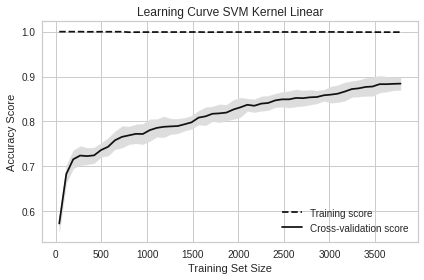

In [ ]:
#Learning Curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel="linear", gamma=1, C=10),data_train_x, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve SVM Kernel Linear")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

SVM KERNEL RBF ✅

In [ ]:
# Process of making models Klasifikasi SVM RBF
rbf = SVC(kernel='rbf')
rbf.fit(data_train_x, y_train)
rbf1 = rbf.predict(data_test_x)
#history time
classifier_rbf = SVC(verbose=1)
time_rbf0 = time.time()
history = rbf.fit(data_train_x, y_train)
time_rbf1 = time.time()
prediction_rbf = rbf.predict(data_train_x)
time_rbf2 = time.time()
time_rbf_train = time_rbf1-time_rbf0
time_rbf_predict = time_rbf2-time_rbf1
y_train_hat_rbf = rbf.predict(data_train_x)
y_test_hat_rbf = rbf.predict(data_test_x)
#hasil tampil data test dan training
y_train_hat_rbf = rbf.predict(data_train_x)
y_test_hat_rbf = rbf.predict(data_test_x)
print ( "train accuracy= "  ,np.mean(y_train_hat_rbf == y_train)*100)
print ("test accuracy= "  ,np.mean(y_test_hat_rbf == y_test)*100)
#tampilkan hasil dari metode svm kernel rbf
rbf.score(data_test_x, y_test)

train accuracy=  99.71428571428571
test accuracy=  89.66666666666666


0.8966666666666666

Accuracy score is 90%.

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       935
           1       0.88      0.91      0.89       865

    accuracy                           0.90      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.90      0.90      0.90      1800


Confusion Matrix:


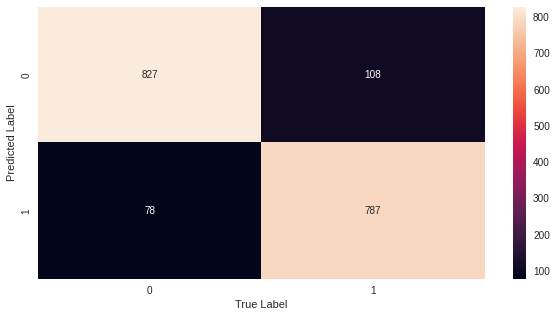



True Positive :  787
True Negative :  827
False Positive :  78
False Negative  :  108


In [ ]:
predictions_RBF = rbf.predict(data_test_x)
test_prediction_RBF = pd.DataFrame()
test_prediction_RBF['Text_bersih'] = X_test
test_prediction_RBF['klasifikasi'] = predictions_RBF
RBF_accuracy= accuracy_score(predictions_RBF, y_test)*100
RBF_accuracy= round(RBF_accuracy,1)
#Deploy confusion matrix
RBF_accuracy = accuracy_score(predictions_RBF,y_test) * 100
print("Accuracy score is {}%.".format (round(RBF_accuracy),1))
print()
print("Classification Report:")
print(classification_report(predictions_RBF, y_test))
print()

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(predictions_RBF,y_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()
# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(y_test, rbf1).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

Accuracy of SVM Classification with  rbf  kernel :  0.8966666666666666
--- 11.058104038238525 seconds ---


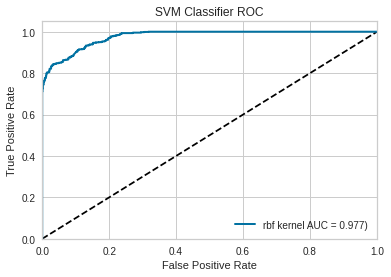

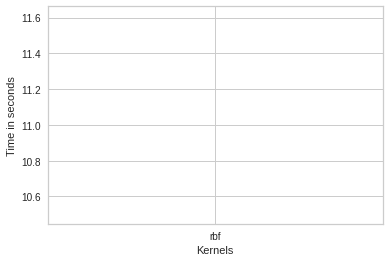

In [ ]:
from sklearn.metrics import roc_curve, auc
kernel_list=['rbf']
time_list=[]
for kernel in kernel_list:
    probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel)
    time_list.append(t)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC')
    plt.plot(fpr, tpr, lw=2, label=kernel+' kernel AUC = %0.3f)'%roc_auc)
    plt.legend()

plt.show()

plt.plot(kernel_list,time_list)
plt.xlabel("Kernels")
plt.ylabel("Time in seconds")
plt.show()

Accuracy of SVM Classification with  rbf  kernel :  0.49722222222222223
--- 17.34920907020569 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.6111111111111112
--- 17.35739016532898 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8377777777777777
--- 14.10538911819458 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8916666666666667
--- 12.168638229370117 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8966666666666666
--- 11.035103559494019 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.9016666666666666
--- 8.84026026725769 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.9016666666666666
--- 9.025512456893921 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.9016666666666666
--- 8.996942520141602 seconds ---


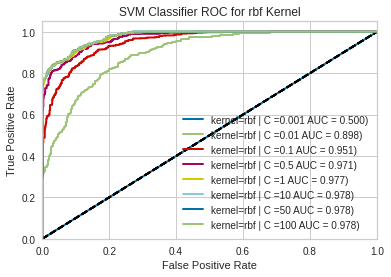

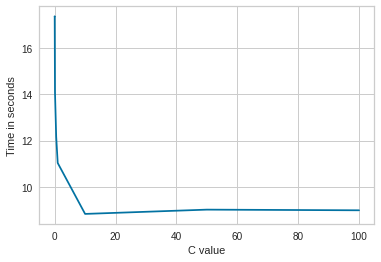

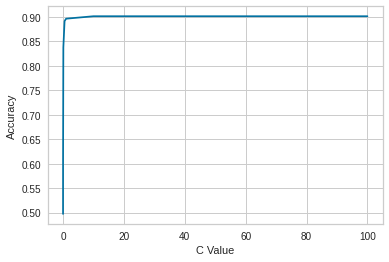

In [ ]:
C = [0.001,0.01,0.1,0.5,1,10,50,100]
time_list=[]
accuracy=[]
for c in C:
    probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel='rbf',C=c)
    time_list.append(t)
    accuracy.append(acc)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC for rbf Kernel')
    plt.plot(fpr, tpr, lw=2, label='kernel=rbf | C ='+str(c)+' AUC = %0.3f)'%roc_auc)
    plt.legend(loc="lower right")

plt.show()

plt.plot(C,time_list)
plt.xlabel("C value")
plt.ylabel("Time in seconds")
plt.show()

plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.plot(C,accuracy)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
rbf_cv= SVC(kernel='rbf',random_state=0,C=100)
scores = cross_val_score(rbf_cv,data_train_x,y_train,cv=10,scoring="accuracy")
scores.mean()

0.8938095238095238

Mean Accuracy for C-Value 0.001 :  0.5011904761904762
Mean Accuracy for C-Value 0.01 :  0.6078571428571429
Mean Accuracy for C-Value 0.1 :  0.8147619047619047
Mean Accuracy for C-Value 0.5 :  0.884047619047619
Mean Accuracy for C-Value 1 :  0.8945238095238095
Mean Accuracy for C-Value 10 :  0.894047619047619
Mean Accuracy for C-Value 50 :  0.8938095238095238
Mean Accuracy for C-Value 100 :  0.8938095238095238


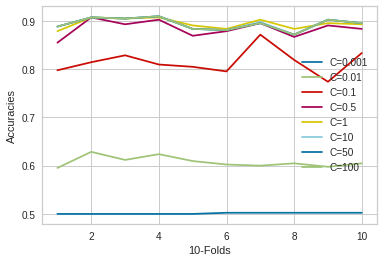

In [ ]:
c_value=[0.001,0.01,0.1,0.5,1,10,50,100]
cv=list(range(1,11))
i=0
mscores = []
for c in c_value:
    rbf_cv = SVC(kernel='rbf',random_state=0,C=c)
    scores = cross_val_score(rbf_cv,data_train_x,y_train,cv=10,scoring="accuracy")
    
    plt.plot(cv,scores,label="C="+str(c))
    plt.xlabel("10-Folds")
    plt.ylabel("Accuracies")
    plt.legend()
    i+=1
    print("Mean Accuracy for C-Value "+str(c)+" : ",scores.mean())
    mscores.append(scores.mean())
#plt.plot(cv, mscores, label="Mean Accuracy")
plt.show()

In [ ]:
scores.mean()

0.8938095238095238

In [ ]:
from sklearn.model_selection import GridSearchCV

param_list = { 'C' : [0.001,0.01,0.1,0.5,1,10,50,100], 'gamma': [0.001,0.01,0.1,1,10,100] }

classrbf = SVC(kernel = 'rbf', random_state = 0)

score = ['accuracy']

classrbf_model = GridSearchCV(estimator = classrbf,
                           param_grid = param_list,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
classrbf_model.fit(data_train_x, np.ravel(y_train))
best_accuracy = classrbf_model.best_score_
best_parameters = classrbf_model.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 89.45 %
Best Parameters: {'C': 1, 'gamma': 1}


In [ ]:
print(" Parameter value with the best f1-macro score:")
classrbf_model.best_params_ , classrbf_model.best_score_, classrbf_model.best_index_

 Parameter value with the best f1-macro score:


({'C': 1, 'gamma': 1}, 0.8945238095238095, 27)

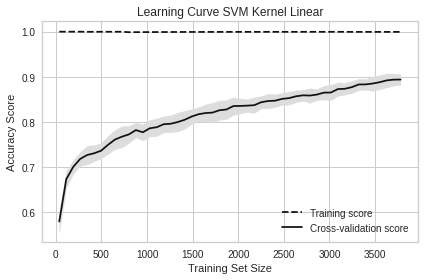

In [ ]:
#Learning Curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel="rbf", gamma=1, C=10),data_train_x, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve SVM Kernel Linear")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

SVM KERNEL POLYNOMINAL ✅


In [ ]:
poly = SVC(kernel='poly',)
poly.fit(data_train_x, y_train)
poly1 = poly.predict(data_test_x)
#history time
classifier_poly = SVC(verbose=1)
time_poly0 = time.time()
history = poly.fit(data_train_x, y_train)
time_poly1 = time.time()
prediction_poly = poly.predict(data_train_x)
time_poly = time.time()
time_poly_train = time_poly-time_poly
time_poly_predict = time_poly-time_poly
y_train_hat_poly = poly.predict(data_train_x)
y_test_hat_poly = poly.predict(data_test_x)
#hasil tampil data test dan training
y_train_hat_poly = poly.predict(data_train_x)
y_test_hat_poly = poly.predict(data_test_x)
print ( "train accuracy= "  ,np.mean(y_train_hat_poly == y_train)*100)
print ("test accuracy= "  ,np.mean(y_test_hat_poly == y_test)*100)
#tampilkan hasil dari metode svm kernel rbf
poly.score(data_test_x, y_test)

train accuracy=  99.92857142857143
test accuracy=  88.5


0.885

Accuracy score is 88%.

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       962
           1       0.85      0.91      0.88       838

    accuracy                           0.89      1800
   macro avg       0.88      0.89      0.88      1800
weighted avg       0.89      0.89      0.89      1800


Confusion Matrix:


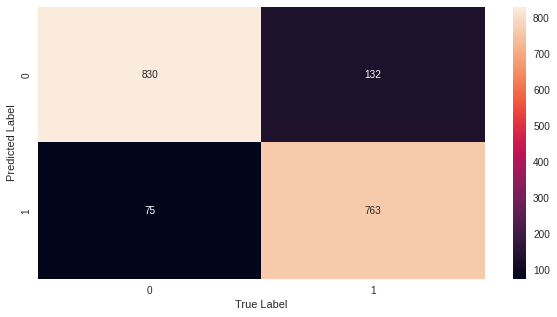



True Positive :  763
True Negative :  830
False Positive :  75
False Negative  :  132


In [ ]:
predictions_poly = poly.predict(data_test_x)
test_prediction_poly = pd.DataFrame()
test_prediction_poly['Text_bersih'] = X_test
test_prediction_poly['klasifikasi'] = predictions_poly
poly_accuracy= accuracy_score(predictions_poly, y_test)*100
poly_accuracy= round(poly_accuracy,1)
#Deploy confusion matrix
RBF_accuracy = accuracy_score(predictions_poly,y_test) * 100
print("Accuracy score is {}%.".format (round(poly_accuracy),1))
print()
print("Classification Report:")
print(classification_report(predictions_poly, y_test))
print()

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(predictions_poly,y_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()
# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(y_test, poly1).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

Accuracy of SVM Classification with  poly  kernel :  0.8861111111111111
--- 10.338183164596558 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8944444444444445
--- 9.964311838150024 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.885
--- 9.798454999923706 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8844444444444445
--- 9.237924337387085 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8716666666666667
--- 9.402596473693848 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8622222222222222
--- 9.055147171020508 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.86
--- 9.27035665512085 seconds ---


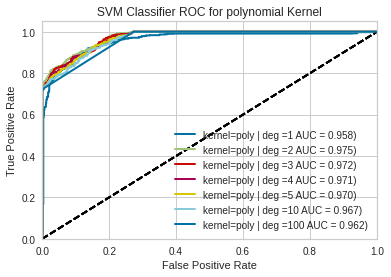

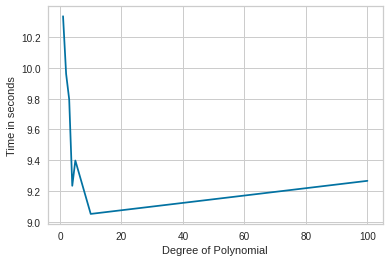

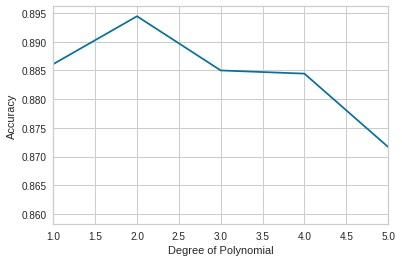

In [ ]:
deg = [1,2,3,4,5,10,100]
time_list=[]
accuracy=[]
for d in deg:
    probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel='poly',degree=d)
    time_list.append(t)
    accuracy.append(acc)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC for polynomial Kernel')
    plt.plot(fpr, tpr, lw=2, label='kernel=poly | deg ='+str(d)+' AUC = %0.3f)'%roc_auc)
    plt.legend(loc="lower right")

plt.show()

plt.plot(deg,time_list)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Time in seconds")
plt.show()

plt.xlabel('Degree of Polynomial')
plt.ylabel('Accuracy')
plt.xlim([1, 5])
#plt.ylim([0.8, 1.00])
plt.plot(deg,accuracy)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC

poly_cv= SVC(kernel='poly',random_state=0,C=10)
scores = cross_val_score(poly_cv,data_train_x,y_train,cv=10,scoring="accuracy")
scores.mean()

0.8809523809523808

Mean Accuracy for Degree 1 :  0.8716666666666667
Mean Accuracy for Degree 2 :  0.8871428571428572
Mean Accuracy for Degree 3 :  0.8769047619047619
Mean Accuracy for Degree 4 :  0.868095238095238
Mean Accuracy for Degree 5 :  0.8564285714285715
Mean Accuracy for Degree 10 :  0.8557142857142856
Mean Accuracy for Degree 100 :  0.8523809523809524


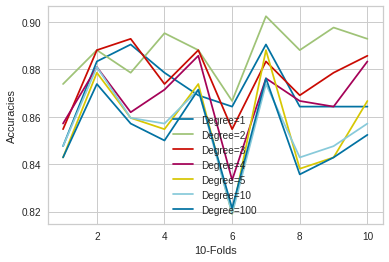

In [ ]:
deg_value = [1,2,3,4,5,10,100]
cv=list(range(1,11))
i=0
mscores = []
for d in deg_value:
    poly_cv = SVC(kernel='poly',random_state=0,degree=d)
    scores = cross_val_score(poly_cv,data_train_x,y_train,cv=10,scoring="accuracy")
    
    plt.plot(cv,scores,label="Degree="+str(d))
    plt.xlabel("10-Folds")
    plt.ylabel("Accuracies")
    plt.legend()
    i+=1
    print("Mean Accuracy for Degree "+str(d)+" : ",scores.mean())
    mscores.append(scores.mean())
#plt.plot(cv, mscores, label="Mean Accuracy")
plt.show()

In [ ]:
scores.mean()

0.8523809523809524

In [ ]:
from sklearn.model_selection import GridSearchCV

param_list = { 'C' : [0.001,0.01,0.1,0.5,1,10,50,100], 'gamma': [0.001,0.01,0.1,1,10,100], 'degree':[1,2,3,4,5,10,100] }

poly_cv = SVC(kernel = 'poly', random_state = 0)

score = ['accuracy']

poly_cv_model = GridSearchCV(estimator = poly_cv,
                           param_grid = param_list,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
poly_cv_model.fit(data_train_x, np.ravel(y_train))
best_accuracy = poly_cv_model.best_score_
best_parameters = poly_cv_model.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 88.74 %
Best Parameters: {'C': 0.5, 'degree': 1, 'gamma': 10}


In [ ]:
print(" Parameter value with the best f1-macro score:")
poly_cv_model.best_params_ , poly_cv_model.best_score_, poly_cv_model.best_index_

 Parameter value with the best f1-macro score:


({'C': 0.5, 'degree': 1, 'gamma': 10}, 0.8873809523809524, 130)

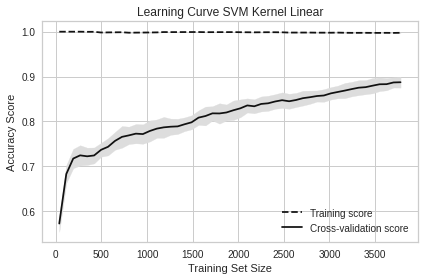

In [ ]:
#Learning Curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel="poly", gamma=10, C=0.5,degree=1),data_train_x, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve SVM Kernel Linear")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()